In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\100 Days of ML\Datasets\IRIS.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df = df[df['species']!=0][['sepal_width','petal_length','species']]

In [8]:
df.shape

(100, 3)

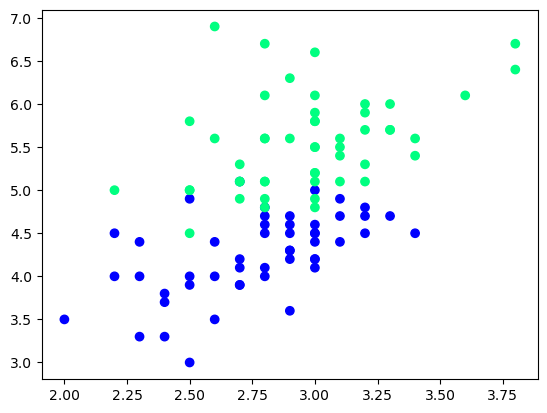

In [9]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [10]:
df = df.sample(100).reset_index(drop=True)
# You get a random subset of 100 rows from your original DataFrame, with a fresh, clean index from 0 to 99.

# the above dataset has 150 rows in which top 50, next 50 and another next 50 belong to same species category.
# hence random sampling

In [11]:
df.head()

,sepal_width,petal_length,species
0,2.4,3.7,1
1,3.2,5.3,2
2,2.8,4.1,1
3,3.0,5.8,2
4,2.5,4.9,1


In [12]:
df_train = df.iloc[:60,:].sample(10) # sample of 10 data points from 1st 60 rows.
df_val = df.iloc[60:80,:].sample(5) # sample of 5 data points from 60th to 80th rows.
df_test = df.iloc[80:,:].sample(5) # sample of 5 data points from last 20 rows.

In [13]:
df_train

,sepal_width,petal_length,species
53,2.2,4.0,1
10,3.0,4.2,1
35,2.5,3.9,1
6,3.2,4.5,1
33,3.0,5.9,2
23,3.4,5.6,2
36,2.6,4.0,1
55,2.8,4.8,2
46,3.1,5.5,2
8,2.7,3.9,1


In [14]:
df_val

,sepal_width,petal_length,species
60,2.4,3.3,1
67,2.7,4.1,1
71,3.0,4.4,1
78,3.1,5.1,2
64,3.0,6.1,2


In [15]:
df_test

,sepal_width,petal_length,species
84,2.3,3.3,1
95,2.8,4.6,1
86,2.8,6.1,2
88,3.3,5.7,2
98,2.5,3.0,1


In [ ]:
# training on df_train and testing on df_val.

In [26]:
X_test = df_val.iloc[:,0:2]
y_test = df_val.iloc[:,-1]

In [27]:
X_test

,sepal_width,petal_length
60,2.4,3.3
67,2.7,4.1
71,3.0,4.4
78,3.1,5.1
64,3.0,6.1


BAGGING

In [28]:
# Data Bag for Decison Tree 1
bag1 = df_train.sample(8,replace=True) 
# the training data for bagging will contain 80%, i.e., 8 out of 10 rows with replacement = True, i.e.,it can have duplicates.

X_train_bag1 = bag1.iloc[:,0:2]
y_train_bag1 = bag1.iloc[:,-1]

bag1

,sepal_width,petal_length,species
35,2.5,3.9,1
6,3.2,4.5,1
36,2.6,4.0,1
8,2.7,3.9,1
36,2.6,4.0,1
6,3.2,4.5,1
35,2.5,3.9,1
46,3.1,5.5,2


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [30]:
def evaluate(clf,X_train,y_train,X_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    plot_tree(clf)
    plt.show()
    plot_decision_regions(X_train.values,y_train.values,clf=clf,legend=2)
    
    print(accuracy_score(y_test,y_pred))

In [31]:
dt_bag1 = DecisionTreeClassifier()

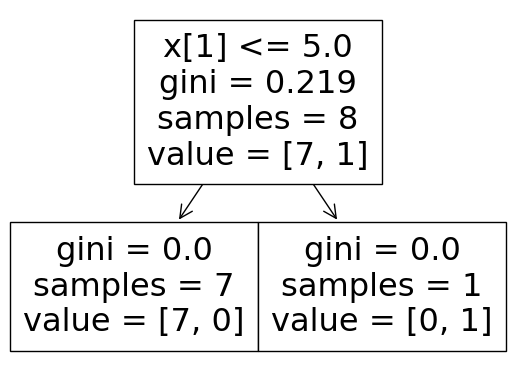

c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


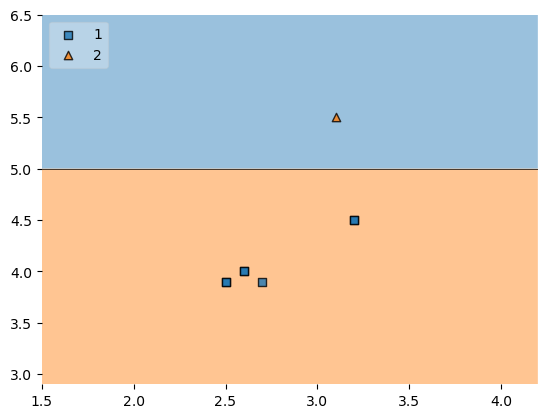

In [32]:
evaluate(dt_bag1,X_train_bag1,y_train_bag1,X_test)

In [34]:
# Data Bag for Decison Tree 2
bag2 = df_train.sample(8,replace=True) 
# the training data for bagging will contain 80%, i.e., 8 out of 10 rows with replacement = True, i.e.,it can have duplicates.

X_train_bag2 = bag2.iloc[:,0:2]
y_train_bag2 = bag2.iloc[:,-1]

bag2

,sepal_width,petal_length,species
36,2.6,4.0,1
46,3.1,5.5,2
10,3.0,4.2,1
10,3.0,4.2,1
55,2.8,4.8,2
6,3.2,4.5,1
8,2.7,3.9,1
46,3.1,5.5,2


In [35]:
dt_bag2 = DecisionTreeClassifier()

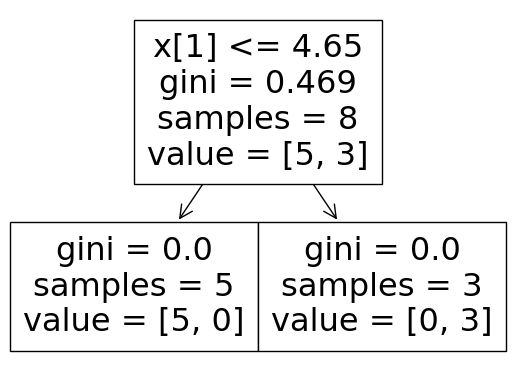

c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


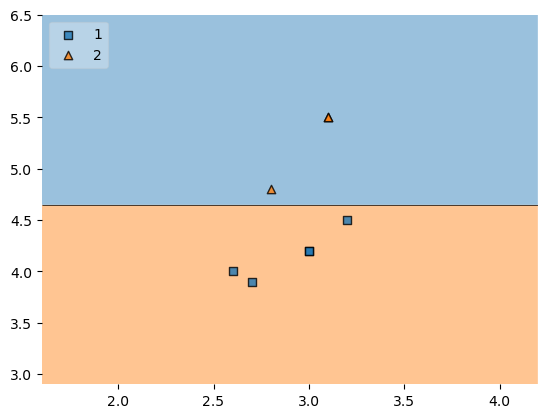

In [36]:
evaluate(dt_bag2,X_train_bag2,y_train_bag2,X_test)

In [37]:
# Data Bag for Decison Tree 3
bag3 = df_train.sample(8,replace=True) 
# the training data for bagging will contain 80%, i.e., 8 out of 10 rows with replacement = True, i.e.,it can have duplicates.

X_train_bag3 = bag3.iloc[:,0:2]
y_train_bag3 = bag3.iloc[:,-1]

bag3

,sepal_width,petal_length,species
55,2.8,4.8,2
33,3.0,5.9,2
6,3.2,4.5,1
55,2.8,4.8,2
23,3.4,5.6,2
10,3.0,4.2,1
8,2.7,3.9,1
36,2.6,4.0,1


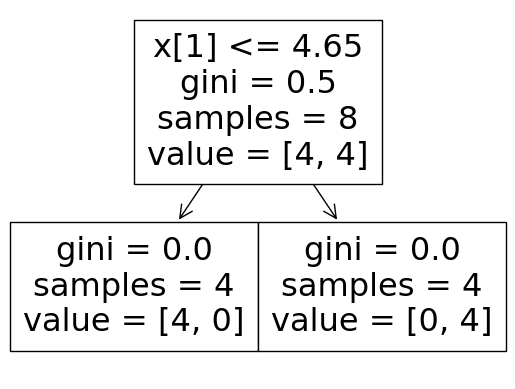

1.0


c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


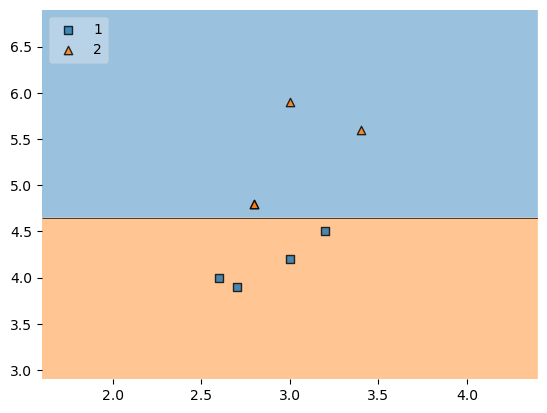

In [38]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X_train_bag3,y_train_bag3,X_test)

Predict

In [84]:
df_test

,sepal_width,petal_length,species
93,2.7,5.1,2
80,3.0,4.9,2
87,2.5,4.9,1
96,2.6,5.6,2
82,3.0,4.8,2


In [85]:
print("Predictor-1",dt_bag1.predict(np.array([2.7,5.1]).reshape(1,2)))
print("Predictor-2",dt_bag2.predict(np.array([2.7,5.1]).reshape(1,2)))
print("Predictor-3",dt_bag3.predict(np.array([2.7,5.1]).reshape(1,2)))

Predictor-1 [2]
Predictor-2 [2]
Predictor-3 [2]


c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [86]:
print("Predictor-1",dt_bag1.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Predictor-2",dt_bag2.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Predictor-3",dt_bag3.predict(np.array([2.5,4.9]).reshape(1,2)))

Predictor-1 [2]
Predictor-2 [2]
Predictor-3 [1]


c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Pasting (row sampling without replacement)

In [58]:
df_train

,sepal_width,petal_length,species
5,2.8,5.6,2
24,3.0,5.8,2
36,2.7,5.1,2
59,2.8,5.1,2
54,2.7,5.3,2
18,3.8,6.4,2
19,2.8,4.9,2
39,2.9,5.6,2
23,2.6,3.5,1
35,2.8,5.6,2


In [59]:
df_train.sample(8)

,sepal_width,petal_length,species
36,2.7,5.1,2
23,2.6,3.5,1
35,2.8,5.6,2
5,2.8,5.6,2
19,2.8,4.9,2
39,2.9,5.6,2
59,2.8,5.1,2
24,3.0,5.8,2


Random Subspaces (column sampling) (replacement allowed)

In [60]:
df1 = pd.read_csv(r"C:\Users\KIIT\Desktop\100 Days of ML\Datasets\IRIS.csv")

In [61]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
df1.sample(2,replace=True,axis=1)

,sepal_length,sepal_length
0,5.1,5.1
1,4.9,4.9
2,4.7,4.7
3,4.6,4.6
4,5.0,5.0
...,...,...
145,6.7,6.7
146,6.3,6.3
147,6.5,6.5
148,6.2,6.2


Column Patches (row and column sampling both)

In [67]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [69]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_length,petal_width
95,4.2,1.2
56,4.7,1.6
15,1.5,0.4
3,1.5,0.2
136,5.6,2.4
71,4.0,1.3
122,6.7,2.0
62,4.0,1.0
